## Basic Neural Network in Keras
We will use simple data of mobile price range classifier. The dataset consists of 20 features and we need to predict the price range in which phone lies. These ranges are divided into 4 classes.
<br>
Dataset - https://www.kaggle.com/iabhishekofficial/mobile-price-classification 


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

file_path = r"amazon.csv"
dataset = pd.read_csv(file_path, encoding="iso-8859-1")
dataset.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,sales
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,???399,"???1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,8315
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,???199,???349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,7072
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,???199,"???1,899",90%,3.9,"7,928",?? Fast Charger& Data Sync??-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,7927
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,???329,???699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,7037
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,???154,???399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,7998


In [3]:


file_path = r"amazon.csv"
amazon_df = pd.read_csv(file_path, encoding="iso-8859-1")

amazon_df.head()

# Checking for missing values
missing_values = amazon_df.isnull().sum()

# Checking for duplicates
duplicates = amazon_df.duplicated().sum()

missing_values, duplicates


(product_id             0
 product_name           0
 category               0
 discounted_price       0
 actual_price           0
 discount_percentage    0
 rating                 0
 rating_count           2
 about_product          0
 user_id                0
 user_name              0
 review_id              0
 review_title           0
 review_content         0
 img_link               0
 product_link           0
 sales                  0
 dtype: int64,
 0)

In [4]:
# Function to convert price and discount percentage columns to numeric
def convert_to_numeric(column):
    return pd.to_numeric(column.str.replace('[^0-9.]', '', regex=True))




In [5]:
# Convert 'discounted_price', 'actual_price', and 'discount_percentage' to numeric
amazon_df['discounted_price'] = convert_to_numeric(amazon_df['discounted_price'])
amazon_df['actual_price'] = convert_to_numeric(amazon_df['actual_price'])
amazon_df['discount_percentage'] = convert_to_numeric(amazon_df['discount_percentage'])



In [6]:
# Replace non-numeric entries in 'rating' with NaN and then convert to numeric
# You can also use 'mean', 'median'
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')


# Convert 'rating_count', handling commas and coercing errors
amazon_df['rating_count'] = pd.to_numeric(amazon_df['rating_count'].str.replace(',', ''), errors='coerce')

# Rechecking the data types after conversion
updated_data_types = amazon_df.dtypes

updated_data_types


product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
sales                    int64
dtype: object

In [7]:


# Convert 'rating' column to string
amazon_df['rating'] = amazon_df['rating'].astype(str)

# Identifying non-numeric entries in the 'rating' column
non_numeric_ratings = amazon_df[~amazon_df['rating'].str.replace('.', '', regex=True).str.isnumeric()]['rating']

non_numeric_ratings.unique()



array(['nan'], dtype=object)

In [8]:
# Removing rows where 'rating' contains '|'
amazon_df = amazon_df[amazon_df['rating'] != '|']

# Converting 'rating' to numeric
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

# Recheck the data types after conversion
updated_data_types = amazon_df.dtypes

updated_data_types


product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
sales                    int64
dtype: object

In [9]:
# Remove rows with any missing values
amazon_df = amazon_df.dropna()

# Check the updated dataset for missing values
updated_missing_values = amazon_df.isnull().sum()
updated_missing_values


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
sales                  0
dtype: int64

In [10]:
amazon_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,sales
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,8315
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,7072
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,?? Fast Charger& Data Sync??-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,7927
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,7037
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,7998


In [11]:

categories = amazon_df['category'].str.split('|').explode()
unique_categories = categories.unique()


In [12]:
unique_categories

array(['Computers&Accessories', 'Accessories&Peripherals',
       'Cables&Accessories', 'Cables', 'USBCables', 'NetworkingDevices',
       'NetworkAdapters', 'WirelessUSBAdapters', 'Electronics',
       'HomeTheater,TV&Video', 'Accessories', 'HDMICables', 'Televisions',
       'SmartTelevisions', 'RemoteControls', 'StandardTelevisions',
       'TVMounts,Stands&Turntables', 'TVWall&CeilingMounts', 'RCACables',
       'HomeAudio', 'SpeakerAccessories', 'Mounts', 'OpticalCables',
       'Projectors', 'Adapters', 'SatelliteEquipment',
       'SatelliteReceivers', 'DVICables', 'SpeakerCables',
       'MediaStreamingDevices', 'StreamingClients',
       'AVReceivers&Amplifiers', 'Speakers', 'TowerSpeakers', '3DGlasses',
       'WearableTechnology', 'SmartWatches', 'Mobiles&Accessories',
       'MobileAccessories', 'Chargers', 'PowerBanks',
       'Smartphones&BasicMobiles', 'Smartphones', 'MemoryCards',
       'MicroSD', 'BasicMobiles', 'Headphones,Earbuds&Accessories',
       'Headphones', '

In [13]:
number_of_categories = len(unique_categories)
print(number_of_categories)


317


In [14]:
amazon_df.drop('about_product', axis=1, inplace=True)
amazon_df.drop('review_id', axis=1, inplace=True)
amazon_df.drop('user_id', axis=1, inplace=True)
amazon_df.drop('product_name', axis=1, inplace=True)
amazon_df.drop('user_name', axis=1, inplace=True)
# amazon_df['user_id'] = amazon_df['user_id'].astype('category')
amazon_df['product_id'] = amazon_df['product_id'].astype('category')



# amazon_df['user_id'] = amazon_df['user_id'].cat.codes
amazon_df['product_id'] = amazon_df['product_id'].cat.codes
amazon_df

,product_id,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,review_content,img_link,product_link,sales
0,346,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,8315
1,847,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,7072
2,818,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,7927
3,643,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,7037
4,588,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,7998
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,672,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59,4.0,1090.0,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,8491
1461,201,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25,4.1,4118.0,"ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,92
1462,27,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28,3.6,468.0,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,4952
1463,61,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26,4.0,8031.0,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,5944


In [15]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    # Ensure text is a string
    text = str(text)
    return sia.polarity_scores(text)['compound']

# Apply the sentiment analysis function to the text data column
# Replace 'review_content' with your actual text data column name
amazon_df['sentiment'] = amazon_df['review_content'].apply(get_sentiment)
amazon_df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,product_id,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,review_content,img_link,product_link,sales,sentiment
0,346,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,8315,0.9033
1,847,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,7072,0.9865
2,818,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,7927,0.6808
3,643,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,7037,0.8316
4,588,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,7998,0.9826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,672,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59,4.0,1090.0,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,8491,0.9468
1461,201,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25,4.1,4118.0,"ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,92,0.7876
1462,27,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28,3.6,468.0,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,4952,0.9698
1463,61,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26,4.0,8031.0,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,5944,-0.2960


In [16]:
amazon_df.drop('review_content', axis=1, inplace=True)
amazon_df

,product_id,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,img_link,product_link,sales,sentiment
0,346,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,"Satisfied,Charging is really fast,Value for mo...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,8315,0.9033
1,847,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,7072,0.9865
2,818,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,"Good speed for earlier versions,Good Product,W...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,7927,0.6808
3,643,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,"Good product,Good one,Nice,Really nice product...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,7037,0.8316
4,588,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,"As good as original,Decent,Good one for second...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,7998,0.9826
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,672,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59,4.0,1090.0,"Received the product without spanner,Excellent...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,8491,0.9468
1461,201,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25,4.1,4118.0,"ok,everything was good couldn't return bcoz I ...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,92,0.7876
1462,27,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28,3.6,468.0,"very good,Work but front melt after 2 month,Go...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,4952,0.9698
1463,61,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26,4.0,8031.0,"Fan Speed is slow,Good quality,Good product,go...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,5944,-0.2960


In [17]:
amazon_df.drop('review_title', axis=1, inplace=True)
amazon_df

,product_id,category,discounted_price,actual_price,discount_percentage,rating,rating_count,img_link,product_link,sales,sentiment
0,346,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,8315,0.9033
1,847,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,7072,0.9865
2,818,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,7927,0.6808
3,643,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,7037,0.8316
4,588,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,7998,0.9826
...,...,...,...,...,...,...,...,...,...,...,...
1460,672,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59,4.0,1090.0,https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,8491,0.9468
1461,201,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25,4.1,4118.0,https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,92,0.7876
1462,27,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28,3.6,468.0,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,4952,0.9698
1463,61,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26,4.0,8031.0,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,5944,-0.2960


In [18]:
amazon_df.drop('img_link', axis=1, inplace=True)
amazon_df.drop('product_link', axis=1, inplace=True)
# amazon_df.drop('sales', axis=1, inplace=True)
amazon_df

,product_id,category,discounted_price,actual_price,discount_percentage,rating,rating_count,sentiment
0,346,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,0.9033
1,847,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,0.9865
2,818,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,0.6808
3,643,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,0.8316
4,588,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,0.9826
...,...,...,...,...,...,...,...,...
1460,672,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59,4.0,1090.0,0.9468
1461,201,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25,4.1,4118.0,0.7876
1462,27,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28,3.6,468.0,0.9698
1463,61,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26,4.0,8031.0,-0.2960


In [19]:
amazon_df.fillna({
    'discounted_price': amazon_df['discounted_price'].mean(),
    'actual_price': amazon_df['actual_price'].mean(),
    'discount_percentage': amazon_df['discount_percentage'].mean(),
    'rating': amazon_df['rating'].mean(),
    'rating_count': amazon_df['rating_count'].mean()
}, inplace=True)


In [20]:
amazon_df['price_difference'] = amazon_df['actual_price'] - amazon_df['discounted_price']
amazon_df['has_discount'] = amazon_df['discount_percentage'].apply(lambda x: 1 if x > 0 else 0)
amazon_df['rating_level'] = pd.cut(amazon_df['rating'], bins=[0, 2, 4, 5], labels=[0, 1,2 ])


In [21]:
one_hot_encoded_data = amazon_df['category'].str.get_dummies(sep='|')

df = amazon_df.join(one_hot_encoded_data)

df.drop('category', axis=1, inplace=True)
df

,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,sentiment,price_difference,has_discount,rating_level,...,WearableTechnology,Webcams,Webcams&VoIPEquipment,WeighingScales,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers
0,346,399.0,1099.0,64,4.2,24269.0,0.9033,700.0,1,2,...,0,0,0,0,0,0,0,0,0,0
1,847,199.0,349.0,43,4.0,43994.0,0.9865,150.0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,818,199.0,1899.0,90,3.9,7928.0,0.6808,1700.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,643,329.0,699.0,53,4.2,94363.0,0.8316,370.0,1,2,...,0,0,0,0,0,0,0,0,0,0
4,588,154.0,399.0,61,4.2,16905.0,0.9826,245.0,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,672,379.0,919.0,59,4.0,1090.0,0.9468,540.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1461,201,2280.0,3045.0,25,4.1,4118.0,0.7876,765.0,1,2,...,0,0,0,0,0,0,0,0,0,0
1462,27,2219.0,3080.0,28,3.6,468.0,0.9698,861.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1463,61,1399.0,1890.0,26,4.0,8031.0,-0.2960,491.0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']  # Add other numerical columns if needed
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df


,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,sentiment,price_difference,has_discount,rating_level,...,WearableTechnology,Webcams,Webcams&VoIPEquipment,WeighingScales,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers
0,346,-0.393050,-0.400165,0.755681,0.356890,0.139448,0.9033,700.0,1,2,...,0,0,0,0,0,0,0,0,0,0
1,847,-0.421835,-0.469094,-0.216248,-0.334200,0.600836,0.9865,150.0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,818,-0.421835,-0.326640,1.959022,-0.679745,-0.242784,0.6808,1700.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,643,-0.403125,-0.436927,0.246575,0.356890,1.779018,0.8316,370.0,1,2,...,0,0,0,0,0,0,0,0,0,0
4,588,-0.428312,-0.464498,0.616834,0.356890,-0.032803,0.9826,245.0,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,672,-0.395929,-0.416707,0.524269,-0.334200,-0.402732,0.9468,540.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1461,201,-0.122332,-0.221316,-1.049330,0.011345,-0.331904,0.7876,765.0,1,2,...,0,0,0,0,0,0,0,0,0,0
1462,27,-0.131111,-0.218100,-0.910483,-1.716380,-0.417281,0.9698,861.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1463,61,-0.249128,-0.327467,-1.003048,-0.334200,-0.240375,-0.2960,491.0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:

X = df.drop(columns=["rating","rating_count"]).values

y =  df[["rating","rating_count"]].values

In [24]:
df[["rating","rating_count"]]

,rating,rating_count
0,0.356890,0.139448
1,-0.334200,0.600836
2,-0.679745,-0.242784
3,0.356890,1.779018
4,0.356890,-0.032803
...,...,...
1460,-0.334200,-0.402732
1461,0.011345,-0.331904
1462,-1.716380,-0.417281
1463,-0.334200,-0.240375


In [25]:
y

array([[ 0.35688975,  0.13944838],
       [-0.33420007,  0.60083605],
       [-0.67974499, -0.2427841 ],
       ...,
       [-1.71637973, -0.41728103],
       [-0.33420007, -0.24037483],
       [ 0.70243467, -0.26479504]])

In [26]:
X

array([[ 3.46000000e+02, -3.93050487e-01, -4.00164511e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.47000000e+02, -4.21835042e-01, -4.69093619e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.18000000e+02, -4.21835042e-01, -3.26640129e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.70000000e+01, -1.31111034e-01, -2.18099761e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.10000000e+01, -2.49127711e-01, -3.27467279e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.34000000e+02, -3.84247657e-02, -1.62037420e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [27]:
len(X[0])

325

In [28]:
len(y[0])

2

In [29]:


# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])


# Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 0)

Normalized data:
[-0.85885971 -0.39305049 -0.40016451  0.75568113  0.21170141 -0.35231352
  0.18622027  0.75746143 -0.02616224 -0.02616224 -0.28663803  1.69042
 -0.05858079 -0.02616224 -0.02616224 -0.05858079 -0.05237828 -0.02616224
 -0.02616224 -0.06936135 -0.04534537 -0.05858079 -0.02616224 -0.06419407
 -0.03701166 -0.02616224 -0.05237828 -0.07870249 -0.02616224 -0.02616224
 -0.03701166 -0.02616224 -0.06419407 -0.03701166 -0.04534537  2.12531907
  2.26778684 -0.03701166 -0.02616224 -0.05237828 -0.04534537 -0.10519034
 -0.05237828 -0.02616224 -0.02616224 -0.04534537 -0.05237828 -0.08706882
 -0.15196405 -0.02616224 -0.02616224 -0.02616224 -0.10181491 -0.02616224
 -0.04534537 -0.02616224 -0.02616224 -0.02616224 -0.02616224 -0.02616224
 -0.05858079 -0.06936135  1.49722582 -0.03701166 -0.03701166 -0.02616224
 -0.02616224 -0.04534537 -0.06936135 -0.06419407 -0.02616224 -0.02616224
 -0.05858079 -0.02616224 -0.09097177 -0.03701166 -0.06936135 -0.05858079
 -0.02616224 -0.03701166 -0.03701166 

In [30]:
print(X_train)

[[-1.17252213  0.39722948  0.18867388 ... -0.11164844 -0.02616224
  -0.02616224]
 [ 0.75611293 -0.11959721  0.23315613 ... -0.11164844 -0.02616224
  -0.02616224]
 [ 1.03348384 -0.07642038 -0.09678453 ... -0.11164844 -0.02616224
  -0.02616224]
 ...
 [ 1.51305035 -0.23041775 -0.2255441  ... -0.11164844 -0.02616224
  -0.02616224]
 [ 1.41195255 -0.42888726 -0.44611725 ... -0.11164844 -0.02616224
  -0.02616224]
 [-0.98588003 -0.39736817 -0.35411987 ... -0.11164844 -0.02616224
  -0.02616224]]


In [31]:
X_train.dtype

dtype('float64')

In [32]:
import tensorflow as tf


In [33]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
len(X[0])

325

In [35]:

model = Sequential()
model.add(Dense(len(X[0]), input_dim=len(X[0]), activation='relu'))  # Adjusted input_dim to match data shape
model.add(Dense(len(X[0])/2, activation='relu'))
model.add(Dense(len(X[0])/2, activation='relu'))
model.add(Dense(len(X[0])/4, activation='relu'))
# model.add(Dense(len(X[0])/4, activation='relu'))
model.add(Dense(len(X[0])/8, activation='relu'))
# model.add(Dense(len(X[0])/16, activation='relu'))
# model.add(Dense(len(X[0])/32, activation='relu'))
# model.add(Dense(2, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.add(Dense(2, activation='softmax'))

In [36]:
# To visualize neural network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 325)               105950    
                                                                 
 dense_1 (Dense)             (None, 162)               52812     
                                                                 
 dense_2 (Dense)             (None, 162)               26406     
                                                                 
 dense_3 (Dense)             (None, 81)                13203     
                                                                 
 dense_4 (Dense)             (None, 40)                3280      
                                                                 
 dense_5 (Dense)             (None, 2)                 82        
                                                                 
 dense_6 (Dense)             (None, 2)                 6

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100


14/14 [==============================] - 1s 2ms/step - loss: 0.0040 - accuracy: 0.5063
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.4276
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: -0.0012 - accuracy: 0.4857
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: -0.0144 - accuracy: 0.5017
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: -0.0296 - accuracy: 0.5245
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: -0.0302 - accuracy: 0.5131
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: -0.0737 - accuracy: 0.6249
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: -0.0914 - accuracy: 0.6249
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: -0.1011 - accuracy: 0.6488
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: -0.0942 - accuracy: 0.6249

In [39]:
y_pred = model.predict(X_test)

# Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

19/19 [==============================] - 0s 979us/step


In [40]:
# Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [41]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred, test)
print('Accuracy is:', a*100)

Accuracy is: 76.06837606837607


In [42]:
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
14/14 [==============================] - 0s 13ms/step - loss: -0.2833 - accuracy: 0.7514 - val_loss: -0.2546 - val_accuracy: 0.7350
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: -0.2793 - accuracy: 0.7252 - val_loss: -0.2425 - val_accuracy: 0.7128
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: -0.2880 - accuracy: 0.7423 - val_loss: -0.2346 - val_accuracy: 0.7111
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: -0.2822 - accuracy: 0.7343 - val_loss: -0.2461 - val_accuracy: 0.7248
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: -0.2612 - accuracy: 0.7013 - val_loss: -0.2360 - val_accuracy: 0.7162
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: -0.2800 - accuracy: 0.7229 - val_loss: -0.2436 - val_accuracy: 0.7265
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: -0.2775 - accuracy: 0.7286 - val_loss: -0.2445 - val_accuracy: 0.717

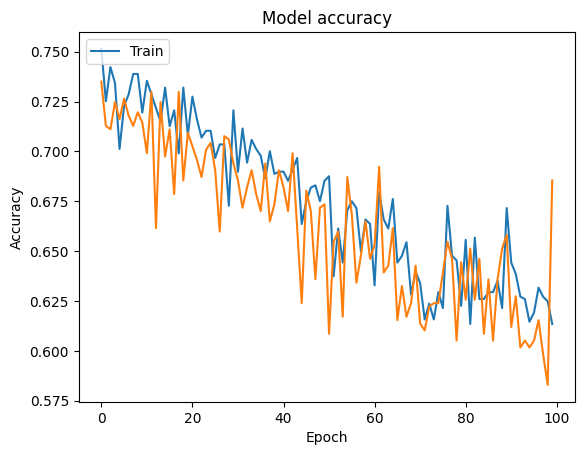

In [43]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

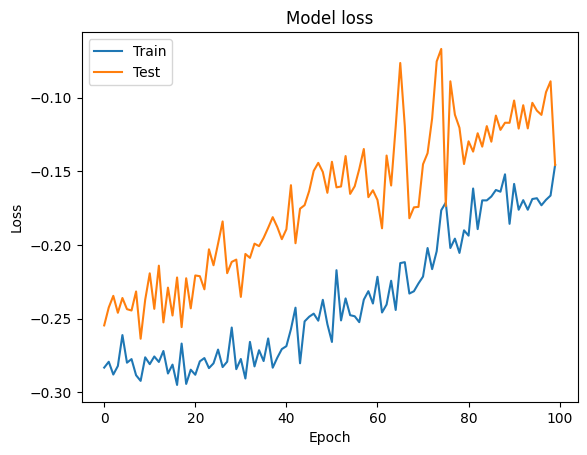

In [44]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [45]:
model.save('models/myhomeworkModel3.h5')


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
